In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 
%matplotlib notebook

import ipysh
import Dummy_g1data as dummy
import models.AEFIT as aefit

import Hunch_utils  as Htls
import Hunch_lsplot as Hplt



reload set for module  Hunch_utils
reload set for module  Hunch_lsplot
reload set for module  models.AEFIT
reload set for module  models.SPFIT
reload set for module  Dummy_g1data


# TEST1: 3G X-strafe

W0610 09:28:24.297944 140551817860928 deprecation.py:323] From /home/andrea/devel/rfx/rfx-hunch/build/conf/python/site-packages/lib/python3.6/site-packages/tensorflow/python/data/ops/dataset_ops.py:410: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
W0610 09:28:24.318155

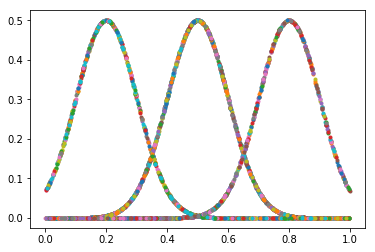

In [2]:
ds = dummy.Dummy_g1data(counts=60000)
ds.kinds =  [
    {'mean': [0.8], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.5], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.2], 'sigma': [0.1], 'gain': [0.5]},    
]

dummy.test_gendata(ds)
m = aefit.AEFIT(latent_dim=2)

In [3]:
# aefit.test_dummy(m, data=ds, epoch=5, batch=200, loss_factor=1e-3)
# m.save('kcp/step2_t1')
m.load('kcp/step2_t1')

In [4]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(m)
p.set_data(ds)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

In [5]:
def simulate_missing_data(m, lpt=[0.5,-1.6], noise_var=0.05, arr = [3,2,1,5,8,7,6,9,12,11,14,13,18]):
    xy = m.decode(tf.convert_to_tensor([pt]),apply_sigmoid=True)
    x,y = tf.split(xy[0], 2)
    x,y = (x.numpy(), y.numpy())

    fig = plt.figure('gen_missing_curve',figsize=(18, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)    
    
    ax1.set_xlim(-2.,2.)
    ax1.set_ylim(-2.,2.)
    
    ax1.scatter(pt[0],pt[1],s=80)
    ax2.scatter(x,y,s=40)

    # apply noise
    x += np.random.normal(0,noise_var,len(x))
    y += np.random.normal(0,noise_var,len(y))

    # apply missing data simulation
    for i,v in enumerate(arr,0):
        x[arr[i]]=x[arr[i]+1]
        y[arr[i]]=y[arr[i]+1]
    
    ax2.scatter(x,y,s=80)

    me,va = m.encode(tf.reshape(tf.concat([x,y],0), shape=[1,-1]))
    print("Guessed Latent point = ",me.numpy())
    gpt = me[0].numpy()
    ax1.scatter(gpt[0],gpt[1])
    
    XY = m.decode(me,apply_sigmoid=True)
    X,Y = tf.split(XY[0], 2)
    X,Y = (X.numpy(), Y.numpy())
    # plt.figure('reconstructed')
    ax2.scatter(X,Y,s=40)
    # plt.plot(X,Y)


Guessed Latent point =  [[-0.00505165  0.01058054]]


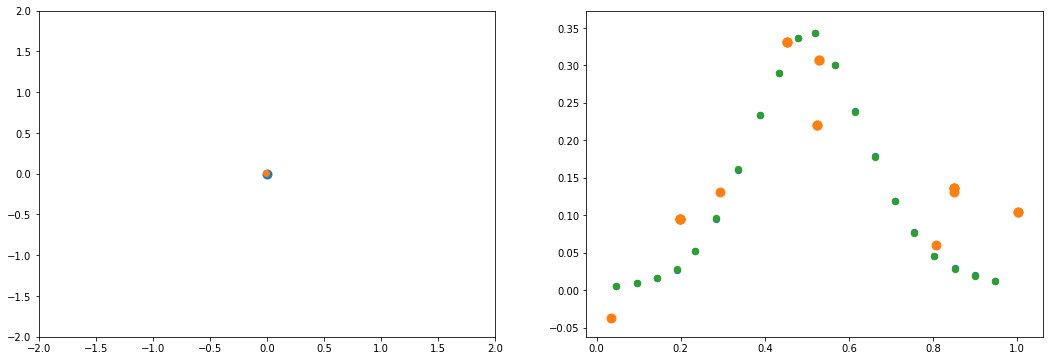

In [6]:
# generate from point: 0,0
pt = [0.0,0.0]
noise_var = 0.05
arr = [3,2,1,5,8,7,6,9,12,11,14,13,18]
simulate_missing_data(m,pt,noise_var,arr)

Guessed Latent point =  [[-0.95852387  0.02946202]]


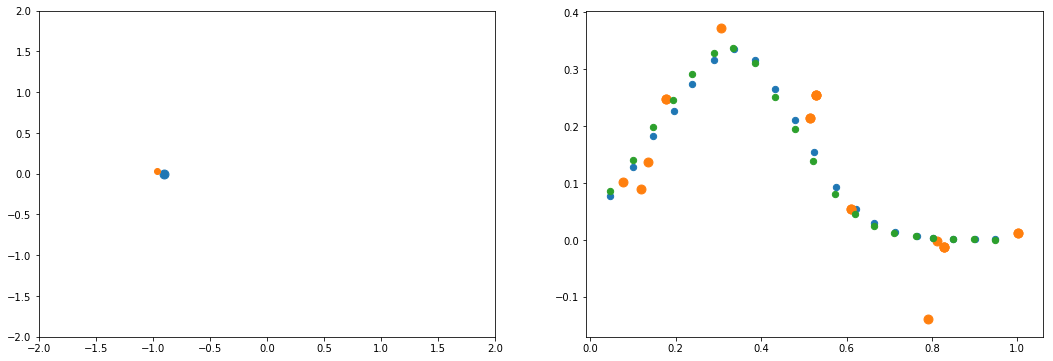

In [7]:
# generate from point: -0.9,0
pt = [-0.9,0]
noise_var = 0.05
arr = [3,6,5,8,7,6,9,12,11,14,13,18]
simulate_missing_data(m,pt,noise_var,arr)


# TEST2: 2G Y-strafe

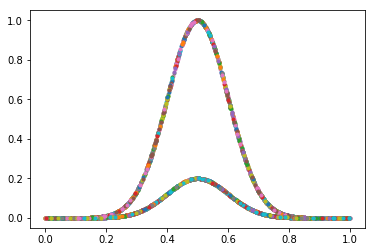

In [8]:
ds = dummy.Dummy_g1data(counts=60000)
ds.kinds =  [
    {'mean': [0.5], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.5], 'sigma': [0.1], 'gain': [0.2]},
]

dummy.test_gendata(ds)
m = aefit.AEFIT(latent_dim=2)

In [9]:
# aefit.test_dummy(m, data=ds2, epoch=5, batch=200, loss_factor=1e-3)
# m.save('kcp/step2_t2')
m.load('kcp/step2_t2')

In [10]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(m)
p.set_data(ds)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

Guessed Latent point =  [[ 0.01688128 -0.8123625 ]]


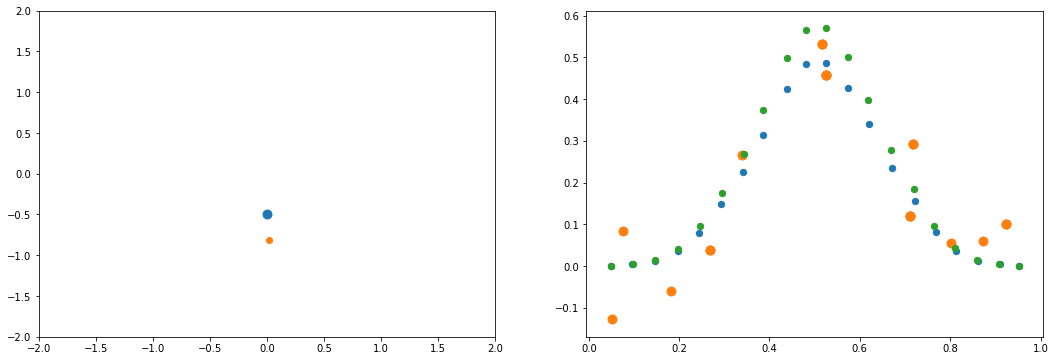

In [11]:
# generate from point: 0,-0.5
pt = [0,-0.5]
noise_var = 0.05
arr = [3,6,5,8,7,6,9,12,11,14,13,18]
simulate_missing_data(m,pt,noise_var,arr)

# 7G X-strafe

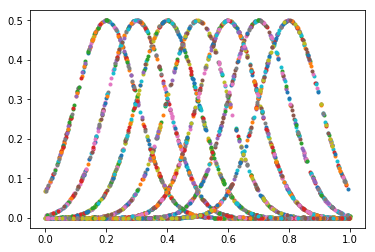

In [13]:
ds = dummy.Dummy_g1data(counts=60000)
ds.kinds =  [
    {'mean': [0.8], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.7], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.6], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.5], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.4], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.3], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.2], 'sigma': [0.1], 'gain': [0.5]},    
]

dummy.test_gendata(ds)
m = aefit.AEFIT(latent_dim=2)

In [16]:
# aefit.test_dummy(m, data=ds, epoch=5, batch=200, loss_factor=1e-3)
# m.save('kcp/step2_t3')
m.load('kcp/step2_t3')

In [17]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(m)
p.set_data(ds)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

# 7+7G XY-strafe

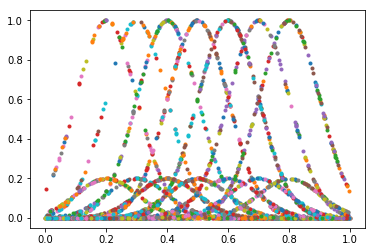

In [19]:
ds = dummy.Dummy_g1data(counts=60000)
ds.kinds =  [
    {'mean': [0.8], 'sigma': [0.1], 'gain': [0.2]},
    {'mean': [0.7], 'sigma': [0.1], 'gain': [0.2]},
    {'mean': [0.6], 'sigma': [0.1], 'gain': [0.2]},
    {'mean': [0.5], 'sigma': [0.1], 'gain': [0.2]},
    {'mean': [0.4], 'sigma': [0.1], 'gain': [0.2]},
    {'mean': [0.3], 'sigma': [0.1], 'gain': [0.2]},
    {'mean': [0.2], 'sigma': [0.1], 'gain': [0.2]},    

    {'mean': [0.8], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.7], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.6], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.5], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.4], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.3], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.2], 'sigma': [0.1], 'gain': [1.]},    
]
dummy.test_gendata(ds)
m = aefit.AEFIT(latent_dim=2)

In [24]:
# aefit.test_dummy(m, data=ds, epoch=5, batch=200, loss_factor=1e-3)
# m.save('kcp/step2_t4')
m.load('kcp/step2_t4')

In [25]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(m)
p.set_data(ds)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

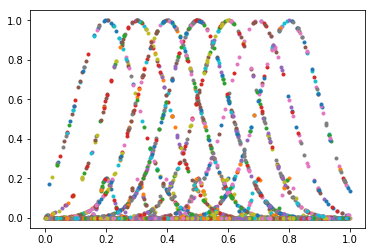

In [26]:
ds = dummy.Dummy_g1data(counts=60000)
ds.kinds =  [
    {'mean': [0.8], 'sigma': [0.02], 'gain': [0.2]},
    {'mean': [0.7], 'sigma': [0.02], 'gain': [0.2]},
    {'mean': [0.6], 'sigma': [0.02], 'gain': [0.2]},
    {'mean': [0.5], 'sigma': [0.02], 'gain': [0.2]},
    {'mean': [0.4], 'sigma': [0.02], 'gain': [0.2]},
    {'mean': [0.3], 'sigma': [0.02], 'gain': [0.2]},
    {'mean': [0.2], 'sigma': [0.02], 'gain': [0.2]},    

    {'mean': [0.8], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.7], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.6], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.5], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.4], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.3], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.2], 'sigma': [0.1], 'gain': [1.]},    
]
dummy.test_gendata(ds)
m = aefit.AEFIT(latent_dim=2)

In [30]:
# aefit.test_dummy(m, data=ds, epoch=5, batch=200, loss_factor=1e-3)
# m.save('kcp/step2_t5')
m.load('kcp/step2_t5')

E0610 10:01:37.967258 140551817860928 web.py:1670] Uncaught exception GET /autoload.js?bokeh-autoload-element=1109&bokeh-absolute-url=http://172.17.0.2:41253&resources=none (172.17.0.1)
HTTPServerRequest(protocol='http', host='172.17.0.2:41253', method='GET', uri='/autoload.js?bokeh-autoload-element=1109&bokeh-absolute-url=http://172.17.0.2:41253&resources=none', version='HTTP/1.1', remote_ip='172.17.0.1')
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tornado/web.py", line 1592, in _execute
    result = yield result
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1133, in run
    value = future.result()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1141, in run
    yielded = self.gen.throw(*exc_info)
  File "/home/andrea/devel/rfx/rfx-hunch/build/conf/python/site-packages/lib/python3.6/site-packages/bokeh/server/views/autoload_js_handler.py", line 60, in get
    session = yield self.get_session()
  File "/u

E0610 10:01:38.090496 140551817860928 web.py:2162] 500 GET /autoload.js?bokeh-autoload-element=5646&bokeh-absolute-url=http://172.17.0.2:42363&resources=none (172.17.0.1) 7.82ms
E0610 10:01:38.140683 140551817860928 web.py:1670] Uncaught exception GET /autoload.js?bokeh-autoload-element=40687&bokeh-absolute-url=http://172.17.0.2:41205&resources=none (172.17.0.1)
HTTPServerRequest(protocol='http', host='172.17.0.2:41205', method='GET', uri='/autoload.js?bokeh-autoload-element=40687&bokeh-absolute-url=http://172.17.0.2:41205&resources=none', version='HTTP/1.1', remote_ip='172.17.0.1')
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tornado/web.py", line 1592, in _execute
    result = yield result
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1133, in run
    value = future.result()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1141, in run
    yielded = self.gen.throw(*exc_info)
  File "/home/andrea/devel/rfx

In [29]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(m)
p.set_data(ds)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...